In [13]:
import pandas as pd
import numpy as np
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

Import data with the regions with already known oncogenes, get rid of unnecessary columns

In [2]:
all_data = pd.read_csv("Selection_of_regions_for_ML.csv")

In [3]:
data = all_data.iloc[:, 8:]

Overall look of the table

In [4]:
data

,is_oncogene,rank_expr_fold_change,rank_TF,rank_median.CRISPR,rank_mean.CRISPR,rank_min.CRISPR,rank_kinase,rank_pubmed_mean,rank_GO_terms,rank_PPI,SUM_RANK
0,0,0.21,0.5,0.05,0.05,0.26,0.53,0.39,0.50,0.50,2.99
1,0,0.63,0.5,0.16,0.16,0.11,0.53,0.26,0.50,0.50,3.35
2,0,0.32,0.5,0.11,0.11,0.05,0.53,0.26,0.50,0.50,2.88
3,0,0.16,0.5,0.58,0.58,0.79,0.53,1.00,0.50,0.50,5.14
4,0,0.47,0.5,0.68,0.68,0.53,0.53,0.74,0.50,0.50,5.13
...,...,...,...,...,...,...,...,...,...,...,...
3752,0,0.56,1.0,0.33,0.44,0.56,0.50,0.78,0.56,0.56,5.29
3753,0,0.67,0.5,0.78,0.78,0.78,0.50,0.50,0.56,0.56,5.63
3754,0,0.78,0.5,0.44,0.33,0.33,0.50,0.33,0.56,0.56,4.33
3755,0,0.89,0.5,0.89,0.89,0.89,0.50,0.50,0.56,0.56,6.18


Target

In [5]:
all_data[["is_oncogene"]]

,is_oncogene
0,0
1,0
2,0
3,0
4,0
...,...
3752,0
3753,0
3754,0
3755,0


Some columns have non-numerical type

Total amount of row with NA out of total is high, but still lets remove them for the simplicity

In [7]:
data.shape

(3757, 11)

Split data into train and test

In [8]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, 1:], data["is_oncogene"], test_size=0.20, random_state=42, stratify=data["is_oncogene"])

In [18]:
clf = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, random_state=42)

In [19]:
clf.n_features_in_

10

In [20]:
y_pred = clf.predict(X_test)

In [21]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy (how many objects got correct labels) is \n{accuracy}")
print()
precision = precision_score(y_test, y_pred)
print(f"Precision (how many oncogenes are actuall oncognes within predicted ones) is \n{precision}")
print()
recall = recall_score(y_test, y_pred)
print(f"Recall (how many oncogenes out of all oncogenes we got right) is \n{recall}")
print()
f1_score = f1_score(y_test, y_pred)
print(f"F1 score is \n{f1_score}")
print()
roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])
print(f"ROC-AUC (performance of model over multiple thresholds in our predicted probabilities) is \n{roc_auc}")

Accuracy (how many objects got correct labels) is 
0.9853723404255319

Precision (how many oncogenes are actuall oncognes within predicted ones) is 
1.0

Recall (how many oncogenes out of all oncogenes we got right) is 
0.8

F1 score is 
0.888888888888889

ROC-AUC (performance of model over multiple thresholds in our predicted probabilities) is 
0.9692969870875179


Try to test multiple max_depth and n_estimators parameters in cross validation.

In [14]:
max_depth_values = [3, 5, 7, 10, None]
n_estimators_values = [50, 100, 150]
cv_scores = {}

# Loop through each max_depth and n_estimators values
for max_depth in max_depth_values:
    for n_estim in n_estimators_values:
        # Create a random forest classifier with the current max_depth value
        clf = RandomForestClassifier(n_estimators=n_estim, max_depth=max_depth, random_state=42)
    
        # Perform 5-fold cross-validation and compute the mean score
        scores = cross_val_score(clf, X_train, y_train, cv=5)
        cv_scores[(max_depth, n_estim)] = np.mean(scores)

# Print the mean cross-validation scores for each max_depth and n_estim
for (max_depth, n_estim), score in cv_scores.items():
    print(f"Max Depth: {max_depth}, N trees: {n_estim}, Mean CV Score: {score:.4f}")

Max Depth: 3, N trees: 50, Mean CV Score: 0.9827
Max Depth: 3, N trees: 100, Mean CV Score: 0.9830
Max Depth: 3, N trees: 150, Mean CV Score: 0.9830
Max Depth: 5, N trees: 50, Mean CV Score: 0.9844
Max Depth: 5, N trees: 100, Mean CV Score: 0.9840
Max Depth: 5, N trees: 150, Mean CV Score: 0.9840
Max Depth: 7, N trees: 50, Mean CV Score: 0.9837
Max Depth: 7, N trees: 100, Mean CV Score: 0.9837
Max Depth: 7, N trees: 150, Mean CV Score: 0.9834
Max Depth: 10, N trees: 50, Mean CV Score: 0.9847
Max Depth: 10, N trees: 100, Mean CV Score: 0.9837
Max Depth: 10, N trees: 150, Mean CV Score: 0.9834
Max Depth: None, N trees: 50, Mean CV Score: 0.9837
Max Depth: None, N trees: 100, Mean CV Score: 0.9830
Max Depth: None, N trees: 150, Mean CV Score: 0.9827


Not much difference observed, let leave our base model.

In [15]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

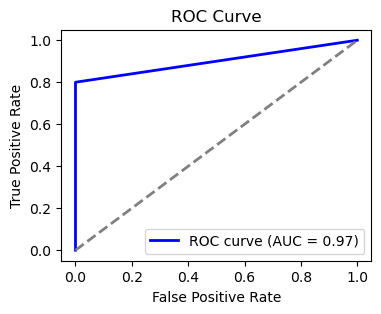

In [16]:
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

Get weights for the features

In [24]:
feature_importances = pd.DataFrame({'feature_name': clf.feature_names_in_, 'importance': clf.feature_importances_})

In [25]:
feature_importances.sort_values(by='importance', ascending=False)

,feature_name,importance
7,rank_GO_terms,0.598327
6,rank_pubmed_mean,0.193447
9,SUM_RANK,0.111717
5,rank_kinase,0.037589
8,rank_PPI,0.020808
1,rank_TF,0.016801
3,rank_mean.CRISPR,0.007414
4,rank_min.CRISPR,0.005675
2,rank_median.CRISPR,0.005404
0,rank_expr_fold_change,0.002818


Visualize one of the trees

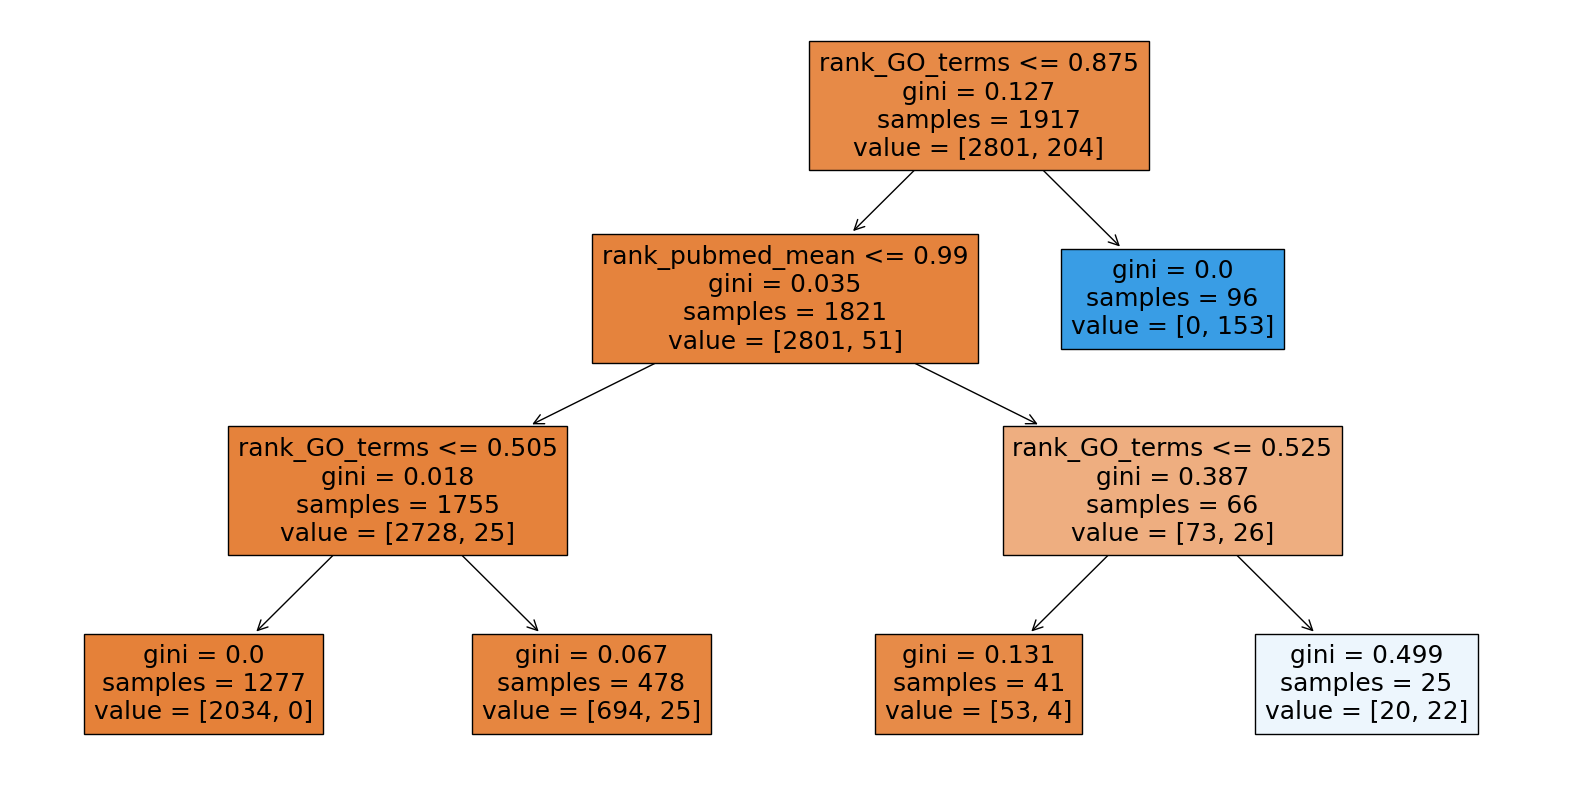

In [26]:
plt.figure(figsize=(20, 10))
_ = tree.plot_tree(clf.estimators_[0], feature_names=list(X_train.columns), filled=True)
plt.show()

Now we take regions without known oncogenes and try to predict which genes are oncogenes in these regions: 
- ONE BY ONE, 
- USE PREDICT PROBA to get probabilities and not class labels
- SELECT ONLY ONE TOP PROBABILITY ONCOGENE PER REGION
- all TSG were removed

In [41]:
new_data = pd.read_csv("Selection_of_regions_without_known_oncognes.csv")

In [43]:
new_data.shape

(20959, 19)

In [44]:
data_to_predict = new_data.iloc[:, 8:]

In [45]:
data_to_predict.head()

,rank_expr_fold_change,rank_TF,rank_median.CRISPR,rank_mean.CRISPR,rank_min.CRISPR,rank_kinase,rank_pubmed_mean,rank_GO_terms,rank_PPI,SUM_RANK,group_num
0,0.14,0.5,0.86,0.86,0.86,0.57,0.21,0.57,0.57,5.14,785
1,1.00,0.5,1.00,1.00,1.00,0.57,0.21,0.57,0.57,6.42,785
2,0.86,1.0,0.43,0.43,0.43,0.57,0.57,0.57,0.57,5.43,785
3,0.64,0.5,0.64,0.64,0.64,0.57,0.93,0.57,0.57,5.70,785
4,0.17,0.5,0.83,0.83,0.83,0.58,0.25,0.58,0.58,5.15,2468


In [48]:
all_predictions = []
max_group = data_to_predict['group_num'].max() + 1

for i in range(1, max_group):
    cur_data = data_to_predict[data_to_predict["group_num"] == i]
    cur_data = cur_data.drop(columns=["group_num"])
    all_predictions.append(clf.predict_proba(cur_data))

In [49]:
len(all_predictions)

3523

In [53]:
all_predictions[0]

array([[0.05231957, 0.94768043]])

In [54]:
import warnings


warnings.filterwarnings('ignore')

final_df =  data_to_predict[data_to_predict["group_num"] == 1]
final_df["prob_of_onco"] = all_predictions[0].T[1]

for i in range(2, 3524):
    cur_df = data_to_predict[data_to_predict["group_num"] == i]
    onco_col = all_predictions[i-1].T[1]
    cur_df["prob_of_onco"] = onco_col
    final_df = pd.concat([final_df, cur_df])

    
final_df

,rank_expr_fold_change,rank_TF,rank_median.CRISPR,rank_mean.CRISPR,rank_min.CRISPR,rank_kinase,rank_pubmed_mean,rank_GO_terms,rank_PPI,SUM_RANK,group_num,prob_of_onco
12653,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,9.00,1,0.947680
18961,0.12,0.56,0.62,0.62,0.62,0.56,0.19,0.56,0.56,4.41,2,0.034635
18962,0.25,0.56,0.88,0.88,0.88,0.56,0.50,0.56,0.56,5.63,2,0.038894
18963,0.38,0.56,1.00,1.00,1.00,0.56,0.50,0.56,0.56,6.12,2,0.041585
18964,0.50,0.56,0.25,0.25,0.12,0.56,1.00,0.56,0.56,4.36,2,0.249821
...,...,...,...,...,...,...,...,...,...,...,...,...
13373,0.33,0.67,0.33,0.33,0.33,0.50,0.67,0.67,0.67,4.50,3522,0.136037
13374,0.67,0.67,1.00,1.00,1.00,0.50,0.33,0.67,0.67,6.51,3522,0.232994
13375,1.00,0.67,0.67,0.67,0.67,1.00,1.00,0.67,0.67,7.02,3522,0.700394
18884,0.50,0.75,1.00,1.00,1.00,0.50,0.50,0.75,0.75,6.75,3523,0.353773


In [55]:
final_df["prob_of_onco"] = final_df["prob_of_onco"].round(4)

In [56]:
final_df.shape

(20959, 12)

In [57]:
result_df = new_data.join(pd.DataFrame(final_df.iloc[:, -1]))
result_df.shape

(20959, 20)

In [84]:
result_df

,Unnamed: 0,X,sample,chr,startpos,endpos,nMajor,region_length,gene_name,rank_expr_fold_change,...,rank_median.CRISPR,rank_mean.CRISPR,rank_min.CRISPR,rank_kinase,rank_pubmed_mean,rank_GO_terms,rank_PPI,SUM_RANK,group_num,prob_of_onco
0,1,1,TCGA-85-A4JB,8,31254,1060634,20,350323,OR4F21,0.14,...,0.86,0.86,0.86,0.57,0.21,0.57,0.57,5.14,791,0.0262
1,2,2,TCGA-85-A4JB,8,31254,1060634,20,350323,RP11-585F1.10,1.00,...,1.00,1.00,1.00,0.57,0.21,0.57,0.57,6.42,791,0.0309
2,3,3,TCGA-85-A4JB,8,31254,1060634,20,350323,ZNF596,0.86,...,0.43,0.43,0.43,0.57,0.57,0.57,0.57,5.43,791,0.0199
3,4,4,TCGA-85-A4JB,8,31254,1060634,20,350323,FBXO25,0.64,...,0.64,0.64,0.64,0.57,0.93,0.57,0.57,5.70,791,0.0463
4,5,5,TCGA-E9-A1N9,8,31254,627181,17,595927,OR4F21,0.17,...,0.83,0.83,0.83,0.58,0.25,0.58,0.58,5.15,2492,0.0280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21372,21373,21373,TCGA-ER-A197,1,242566798,243006007,19,439209,PLD5,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,9.00,2620,0.9262
21373,21374,21374,TCGA-DX-AB2H,1,244460667,244920820,15,460153,C1orf100,0.50,...,0.50,0.50,0.50,0.62,0.50,0.62,0.62,4.98,2341,0.0583
21374,21375,21375,TCGA-DX-AB2H,1,244460667,244920820,15,460153,ADSS,0.75,...,0.75,0.75,0.75,0.62,0.75,0.62,0.62,6.23,2341,0.0761
21375,21376,21376,TCGA-DX-AB2H,1,244460667,244920820,15,460153,C1orf101,0.25,...,1.00,1.00,1.00,0.62,0.25,0.62,0.62,5.98,2341,0.1128


In [58]:
result_df.to_csv('Prediction_by_RandomForest_by_regions.csv', index=False)